# 7. Noisy Data
7-1. Data Exploration   
7-2. Delete the outliers (IQRx2)   
7-3. Num_Floors Selection   
 

In [1]:
#載入套件
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import missingno as msno

#匯入自己寫的程式
import dataframe_format as ff
import human_read_data as hr
import plot_analysis as pa

In [2]:
df = pd.read_csv('6_missingvalue_houseage.csv')
#df.info()

In [3]:
df = ff.reindex_noisydata(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119440 entries, 0 to 119439
Data columns (total 44 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Identifier          119440 non-null  object 
 1   Num_Land            119440 non-null  int64  
 2   Num_Building        119440 non-null  int64  
 3   Num_ParkingSpace    119440 non-null  int64  
 4   Storeys             119440 non-null  float64
 5   Floor_Arabic        119440 non-null  float64
 6   Num_Floors          119440 non-null  float64
 7   HouseAge            119440 non-null  int64  
 8   CompletionYear      119440 non-null  int64  
 9   TransactionDate_AD  119440 non-null  int64  
 10  TransactionYear     119440 non-null  int64  
 11  TransactionMonth    119440 non-null  int64  
 12  Bedrooms            119440 non-null  int64  
 13  LivingRooms         119440 non-null  int64  
 14  Bathrooms           119440 non-null  int64  
 15  TotalArea           119440 non-nul

# 7-1. Data Exploration

In [6]:
#查看各欄位缺失植數量
missing_values = df.isna().sum()
missing_value_true = missing_values[missing_values > 1]
print(missing_value_true)

Series([], dtype: int64)


In [7]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

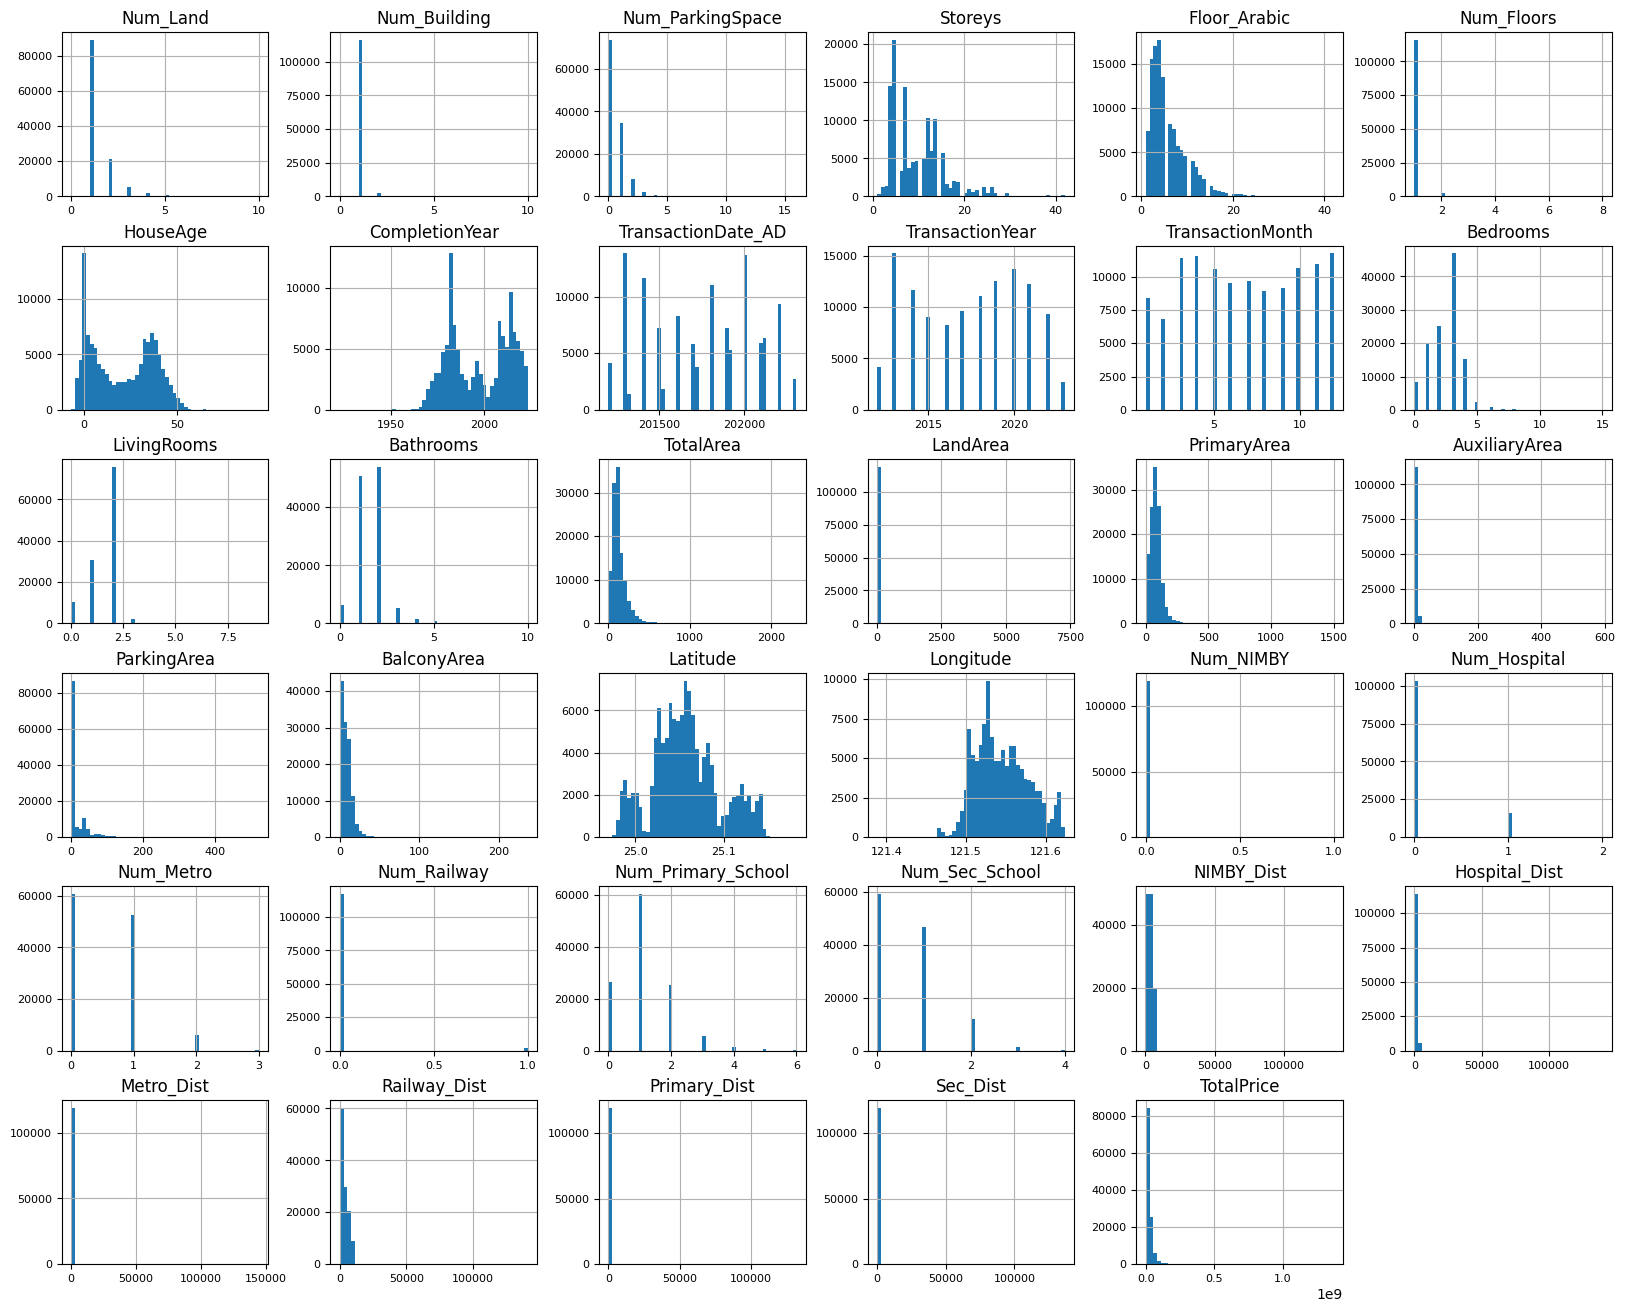

In [8]:
df_num.hist(figsize=(20, 16), bins=50, xlabelsize=8, ylabelsize=8);

In [9]:
#summary statistics for numerical features
summary_stats = df_num.describe().T.round(2)
display(summary_stats)

,count,mean,std,min,25%,50%,75%,max
Num_Land,119440.0,1.39,0.89,0.00,1.00,1.00,2.00,1.000000e+01
Num_Building,119440.0,1.03,0.21,0.00,1.00,1.00,1.00,1.000000e+01
Num_ParkingSpace,119440.0,0.51,0.79,0.00,0.00,0.00,1.00,1.600000e+01
Storeys,119440.0,9.90,5.72,1.00,5.00,9.00,13.00,4.200000e+01
Floor_Arabic,119440.0,5.88,4.21,1.00,3.00,5.00,8.00,4.200000e+01
Num_Floors,119440.0,1.04,0.27,1.00,1.00,1.00,1.00,8.000000e+00
HouseAge,119440.0,20.64,16.60,-7.00,4.00,21.00,36.00,9.400000e+01
CompletionYear,119440.0,1996.75,16.22,1923.00,1981.00,1996.00,2013.00,2.023000e+03
TransactionDate_AD,119440.0,201745.46,315.33,201201.00,201411.00,201803.00,202008.00,2.023050e+05
TransactionYear,119440.0,2017.39,3.16,2012.00,2014.00,2018.00,2020.00,2.023000e+03


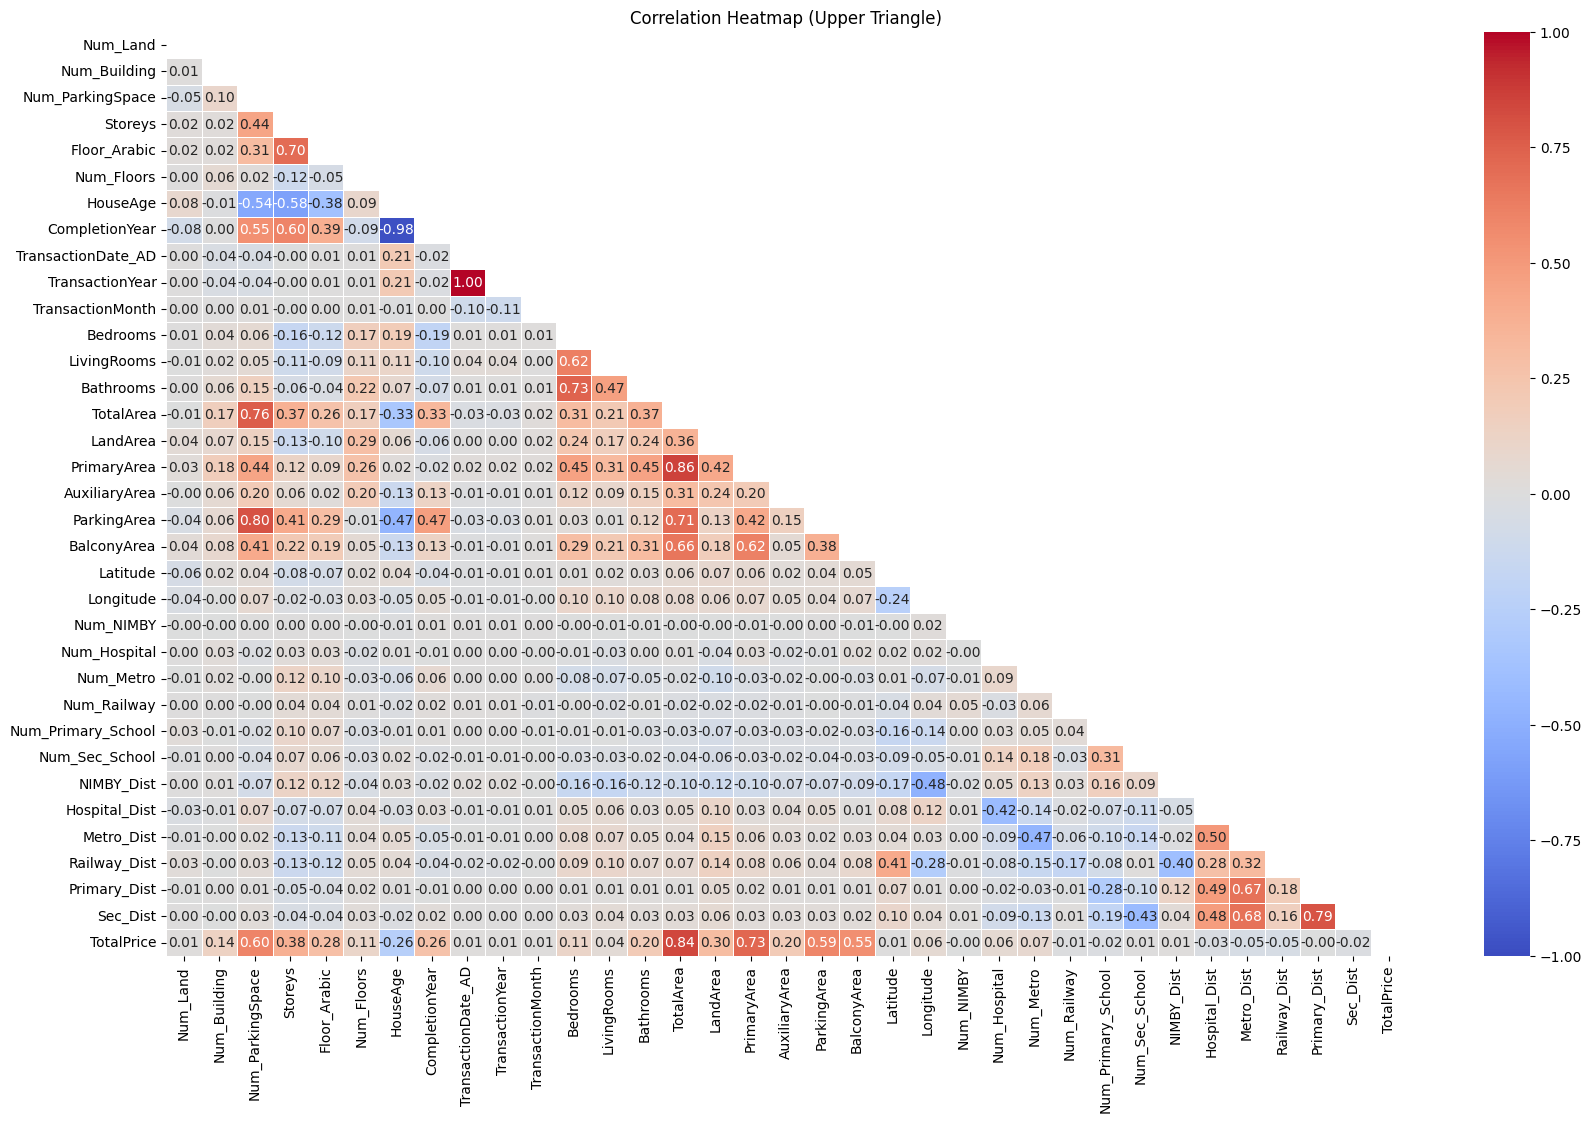

<Figure size 640x480 with 0 Axes>

In [10]:
# Calculate the correlation coefficient matrix
pa.all_corr_heatmap(df)
# save figure
plt.savefig("corr_heatmap.png")

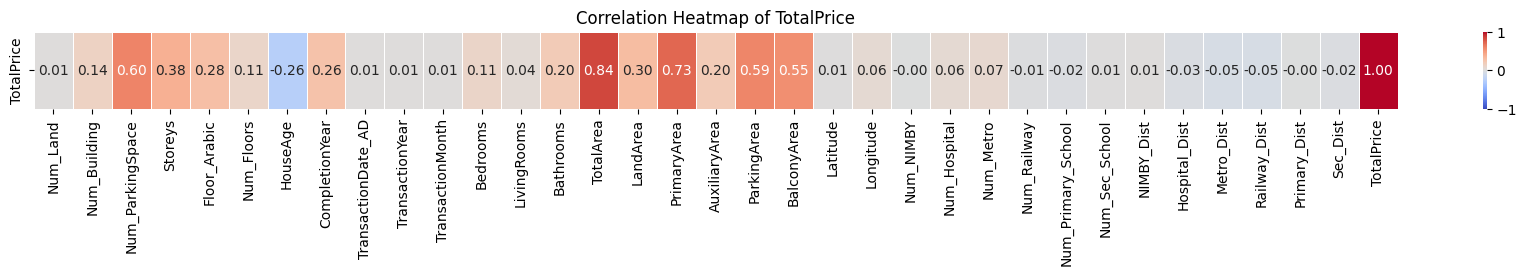

In [11]:
pa.one_column_heatmap(df, 'TotalPrice')

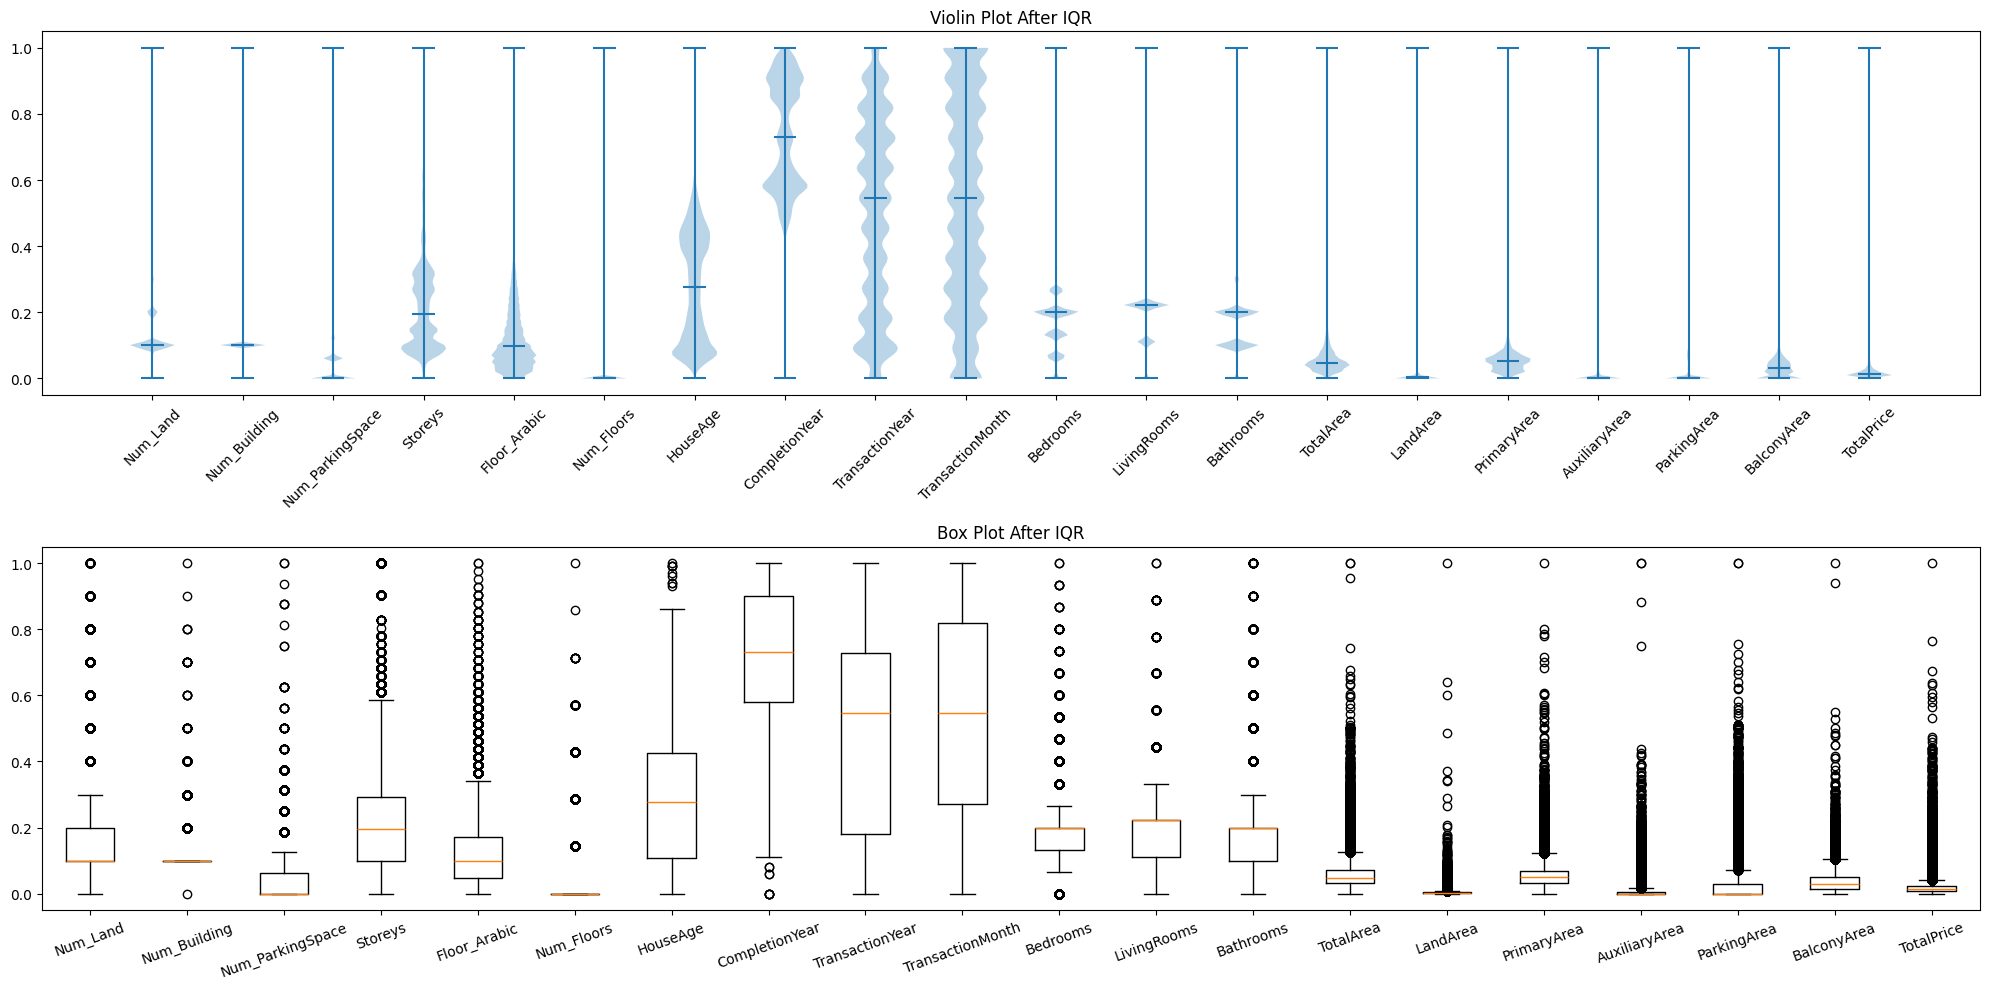

In [12]:
# 將數值欄位 Normalized，畫出 Violin/box plot
data_labels = ['Num_Land', 'Num_Building', 'Num_ParkingSpace',
               'Storeys', 'Floor_Arabic', 'Num_Floors',
               'HouseAge', 'CompletionYear', 'TransactionYear', 'TransactionMonth',
               'Bedrooms', 'LivingRooms', 'Bathrooms',
               'TotalArea', 'LandArea', 'PrimaryArea', 'AuxiliaryArea', 
               'ParkingArea', 'BalconyArea',
               'TotalPrice']

df_normalized = df.copy()
for name in data_labels:
    df_normalized = pa.normalization(df_normalized, name)
    
pa.violin_box_all(df_normalized, data_labels)

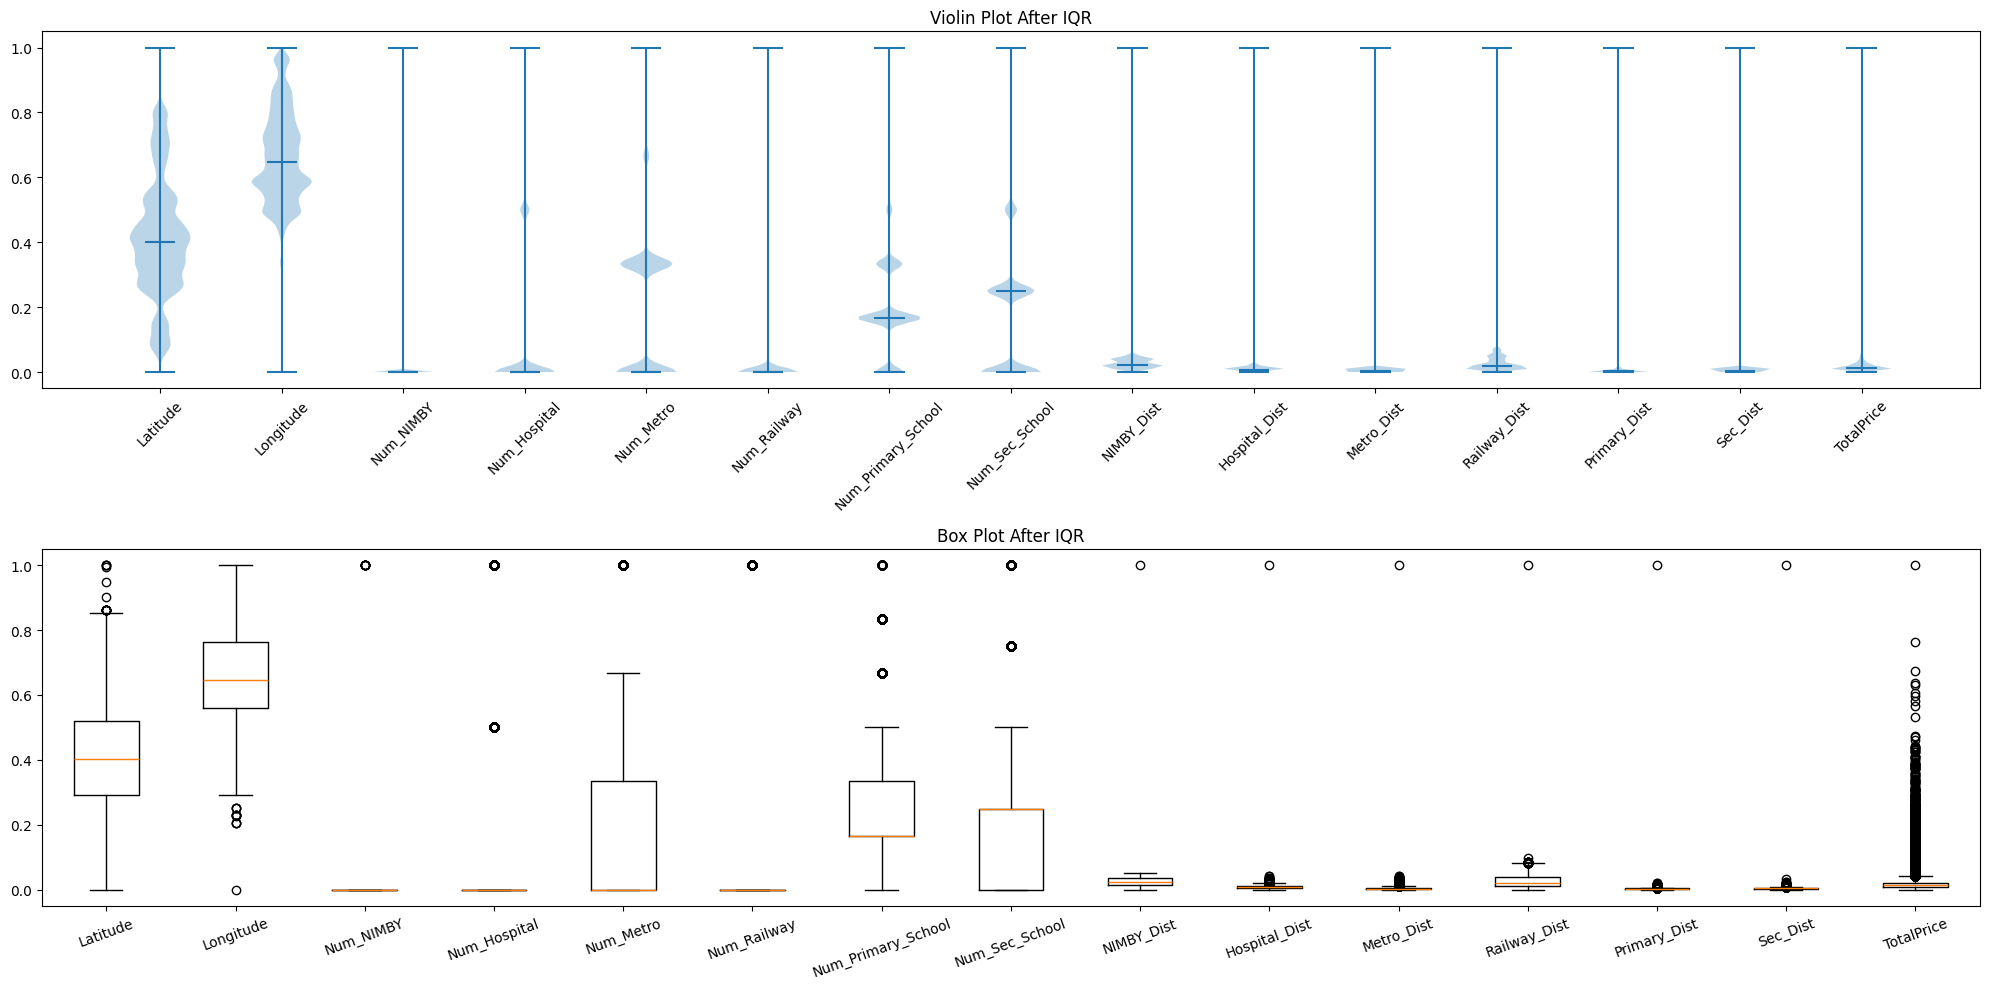

In [13]:
# 將數值欄位 Normalized，畫出 Violin/box plot
data_labels = ['Latitude', 'Longitude',
                'Num_NIMBY', 'Num_Hospital', 'Num_Metro',
                'Num_Railway', 'Num_Primary_School', 'Num_Sec_School',
                'NIMBY_Dist', 'Hospital_Dist', 'Metro_Dist',
                'Railway_Dist', 'Primary_Dist',  'Sec_Dist',
                'TotalPrice']

df_normalized = df.copy()
for name in data_labels:
    df_normalized = pa.normalization(df_normalized, name)
    
pa.violin_box_all(df_normalized, data_labels)

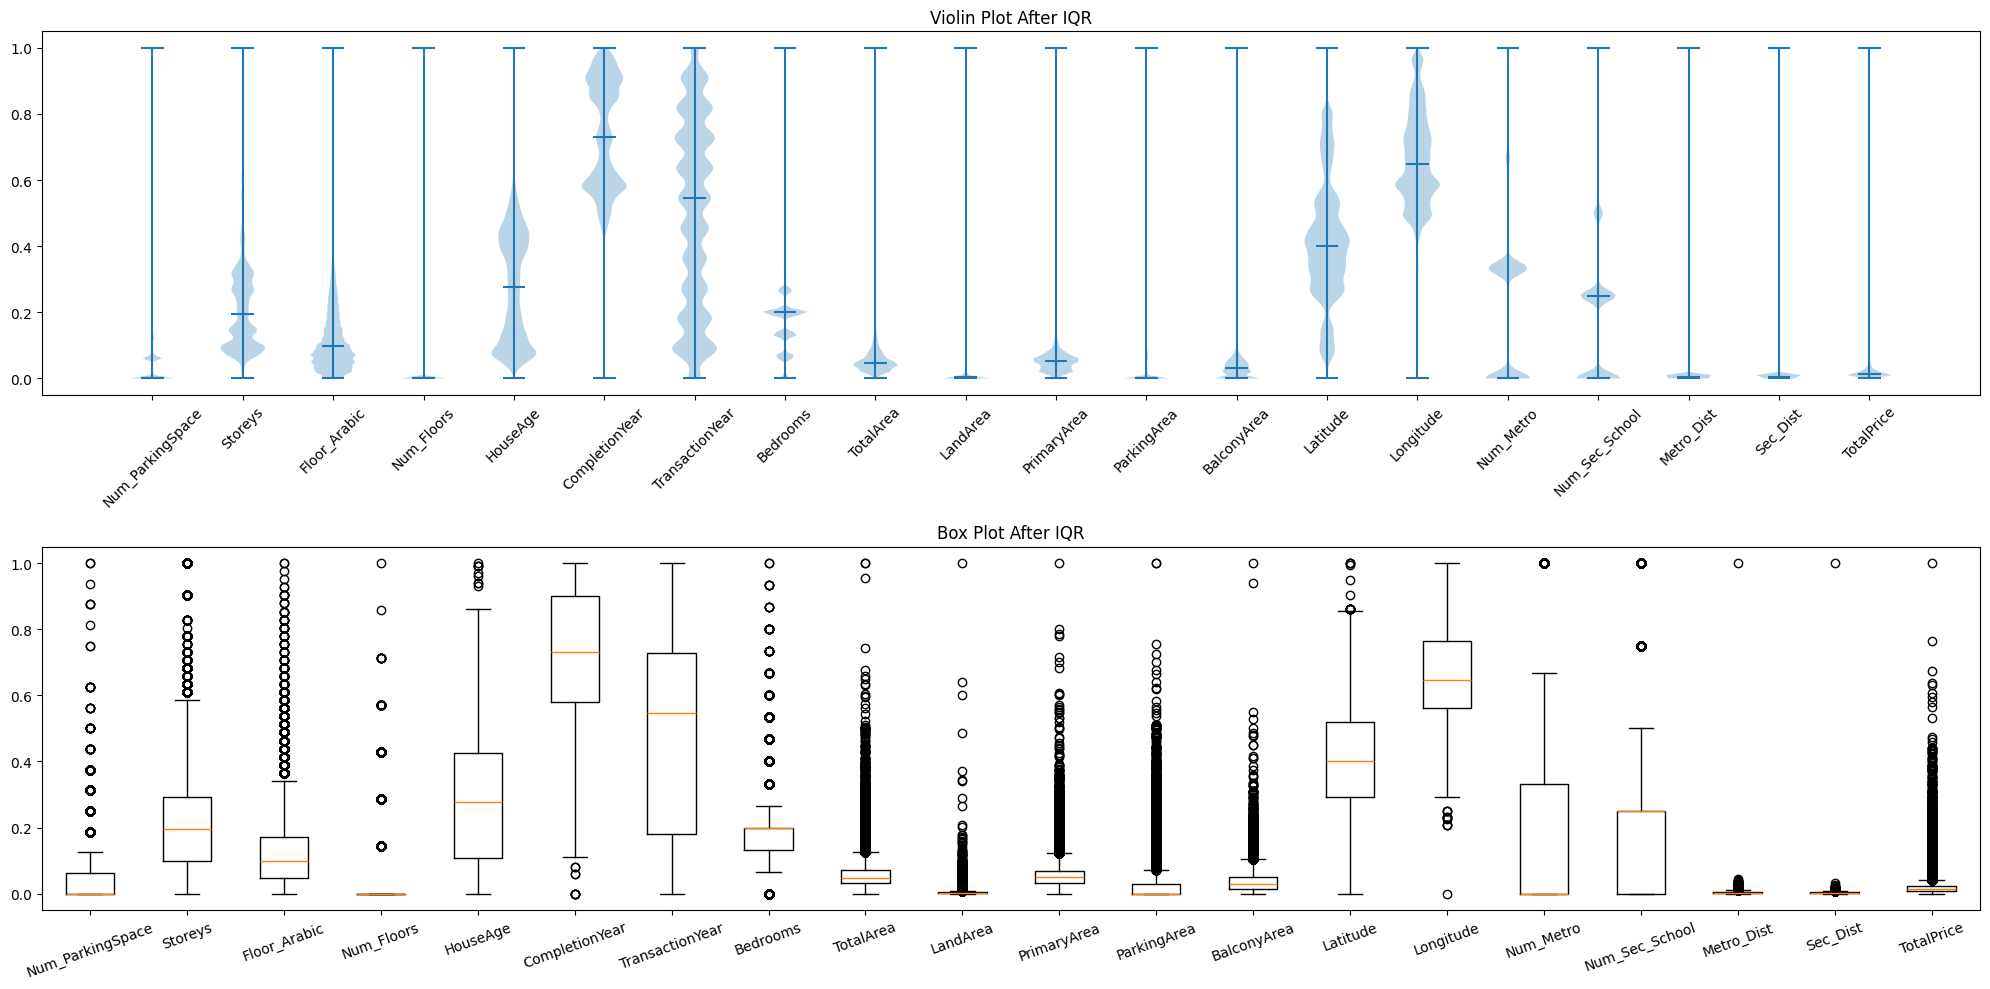

In [41]:
# Creat a simple plot for powerpoint
#data_labels = ['Num_ParkingSpace', 'Storeys', 'Floor_Arabic', 'Num_Floors',
#               'HouseAge', 'CompletionYear', 'TransactionYear',
#               'Bedrooms', 'TotalArea', 'LandArea', 'PrimaryArea', 'ParkingArea', 'BalconyArea',
#               'Latitude', 'Longitude',
#               'Num_Metro', 'Num_Sec_School', 'Metro_Dist', 'Sec_Dist',
#               'TotalPrice']

#df_normalized = df.copy()
#for name in data_labels:
#    df_normalized = pa.normalization(df_normalized, name)
    
#pa.violin_box_all(df_normalized, data_labels)

# 7-2. Delete the outliers (IQRx2)
----Target. TotalPrice (IQRx2)   
----Feature1. TotalArea (IQRx2)   
----Feature2. Metro_Dist (IQRx2)   
----Feature3. LandArea (IQRx2)   
----Feature4. Num_Floors (Selection)   

# Target. TotalPrice

Shape Of The Before Ouliers:  (119440,)
30000000.0 12300000.0
TotalPrice Shape Of The After Ouliers: (112776, 44)


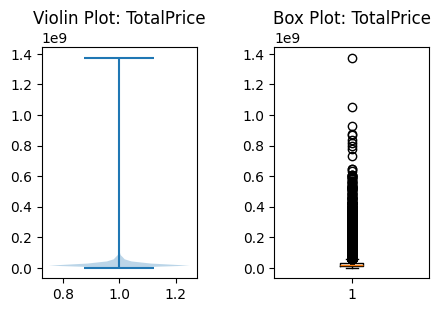

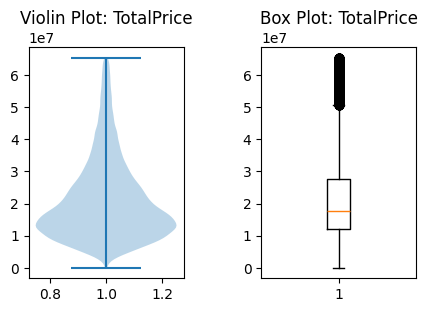

In [15]:
# 離群值篩選: 'TotalPrice'
df_IQR = pa.IQR(df, 'TotalPrice')

count    1.127760e+05
mean     2.125321e+07
std      1.286355e+07
min      4.831000e+03
25%      1.200000e+07
50%      1.780000e+07
75%      2.750000e+07
max      6.539000e+07
Name: TotalPrice, dtype: float64
112776


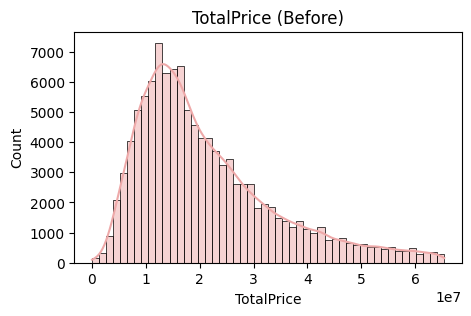

In [16]:
# 查看TotalPrice資料分布情況
print(df_IQR['TotalPrice'].describe())
print(len(df_IQR['TotalPrice']))
plt.figure(figsize=(5, 3))
plt.title('TotalPrice (Before)')
sns.histplot(df_IQR['TotalPrice'], color='#EEA9A9', bins=50, kde=True)
plt.show()

In [17]:
len(df_IQR[(df_IQR['TotalPrice'].astype(int) <= 1000000)])
df_IQR = df_IQR[(df_IQR['TotalPrice'].astype(int) >= 1000000)]

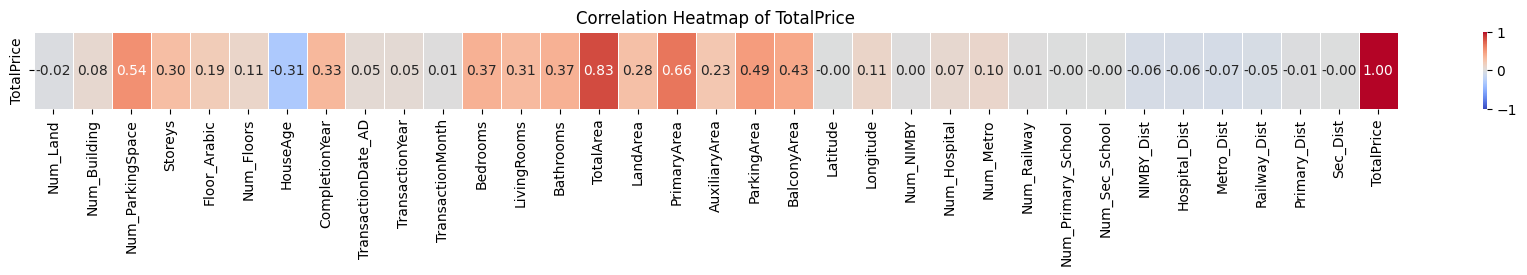

In [18]:
pa.one_column_heatmap(df_IQR, 'TotalPrice')

# Feature1. TotalArea

Shape Of The Before Ouliers:  (112649,)
149.86 73.67
TotalArea Shape Of The After Ouliers: (110927, 44)


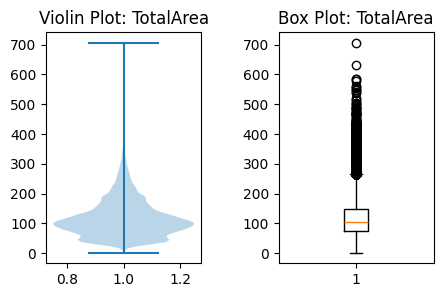

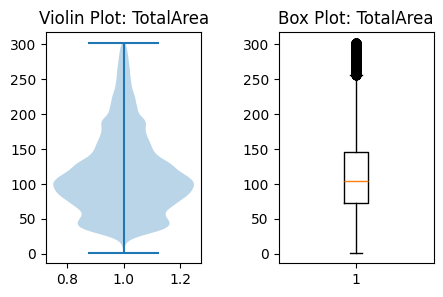

In [19]:
# 離群值篩選: 'TotalArea'
df_IQR = pa.IQR(df_IQR, 'TotalArea')

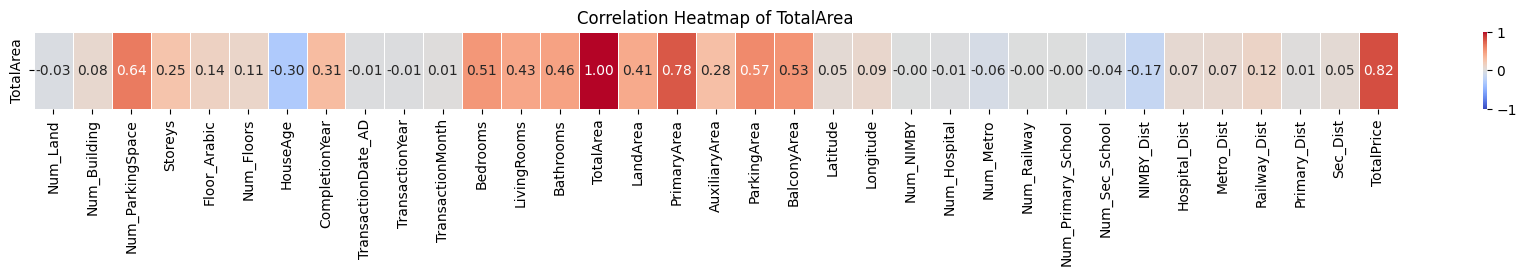

In [20]:
pa.one_column_heatmap(df_IQR, 'TotalArea')

# Feature2. Metro_Dist

Shape Of The Before Ouliers:  (110927,)
794.131612070684 339.513102459612
Metro_Dist Shape Of The After Ouliers: (106182, 44)


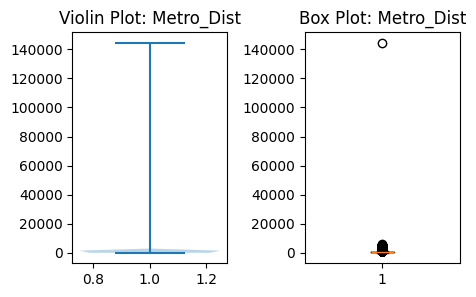

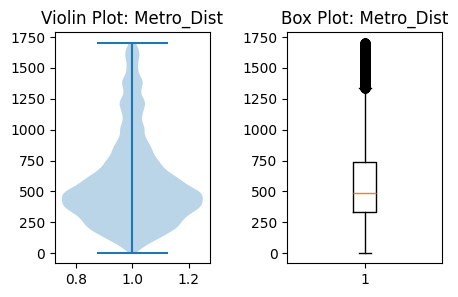

In [21]:
# 離群值篩選: 'Metro_Dist'
df_IQR = pa.IQR(df_IQR, 'Metro_Dist')

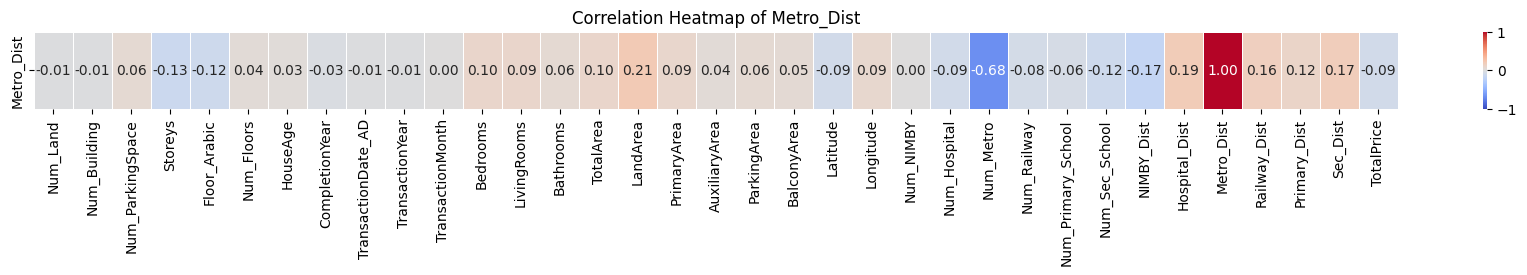

In [22]:
pa.one_column_heatmap(df_IQR, 'Metro_Dist')

# Feature3. LandArea

Shape Of The Before Ouliers:  (106182,)
32.65 12.2
LandArea Shape Of The After Ouliers: (104262, 44)


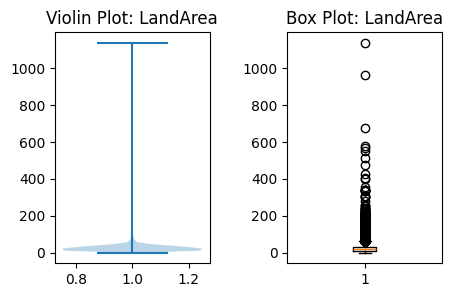

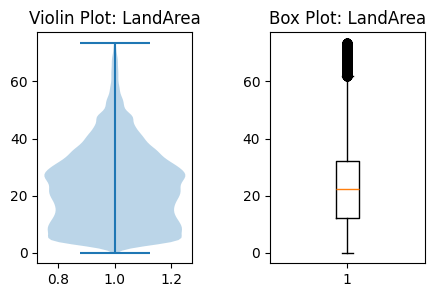

In [23]:
# 離群值篩選: 'LandArea'
df_IQR = pa.IQR(df_IQR, 'LandArea')

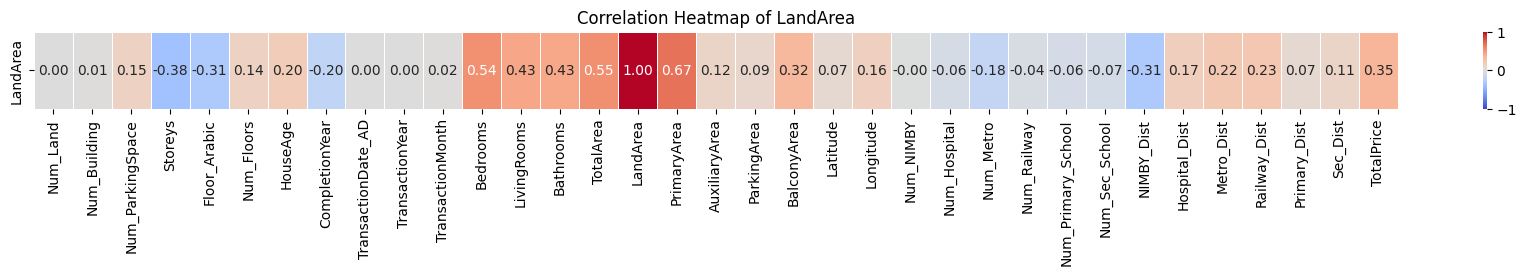

In [24]:
pa.one_column_heatmap(df_IQR, 'LandArea')

In [25]:
df_IQR.to_csv('7_noisy_data.csv', encoding='utf-8-sig', index=False)

# Feature4. Num_Floors (Selection)

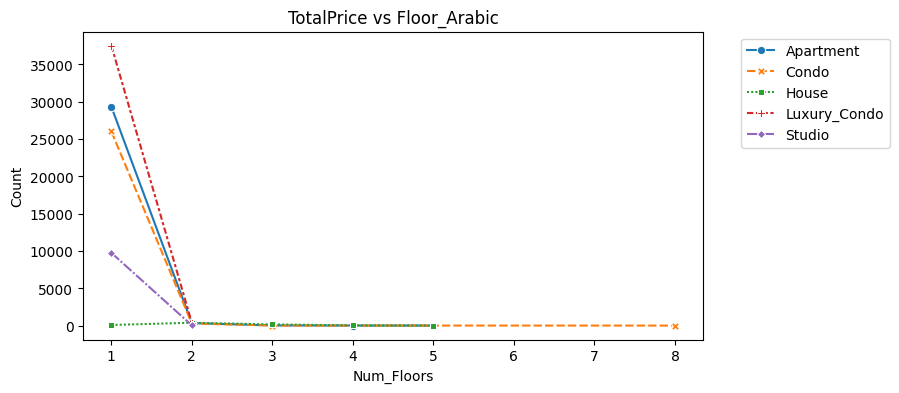

In [26]:
# Type 各年的交易量 (line plot)
plt.figure(figsize=(8, 4))
data = df_IQR.groupby(['Num_Floors', 'Type']).size().reset_index(name='Count')
sns.lineplot(data=data, x='Num_Floors', y='Count', hue='Type', style='Type', markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('TotalPrice vs Floor_Arabic')
plt.show()

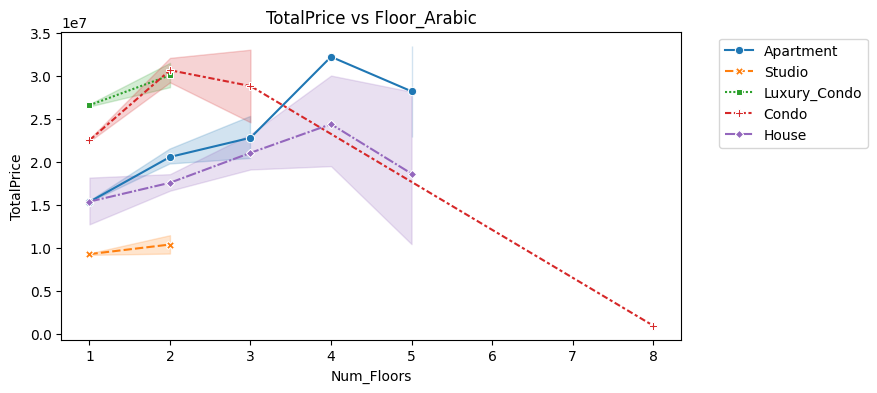

In [27]:
# Type 各年的交易量 (line plot)
plt.figure(figsize=(8, 4))
sns.lineplot(data=df_IQR, x='Num_Floors', y='TotalPrice', hue='Type', style='Type', markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('TotalPrice vs Floor_Arabic')
plt.show()

In [28]:
df_IQR = df_IQR[(df_IQR['Num_Floors'] < 6)]
print(f'row_count: {len(df_IQR)}')

row_count: 104261


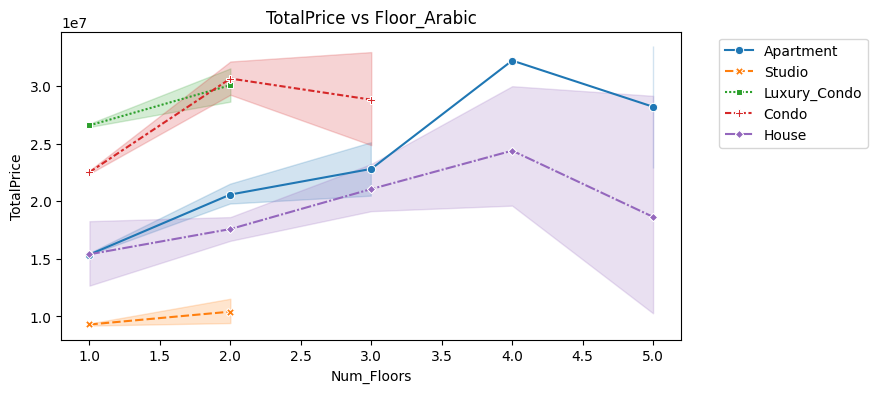

In [29]:
# Type 各年的交易量 (line plot)
plt.figure(figsize=(8, 4))
sns.lineplot(data=df_IQR, x='Num_Floors', y='TotalPrice', hue='Type', style='Type', markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('TotalPrice vs Floor_Arabic')
plt.show()

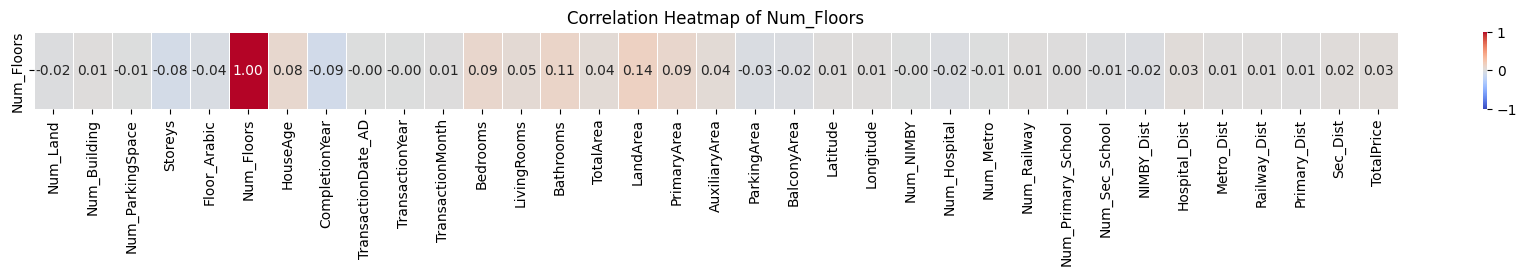

In [30]:
pa.one_column_heatmap(df_IQR, 'Num_Floors')

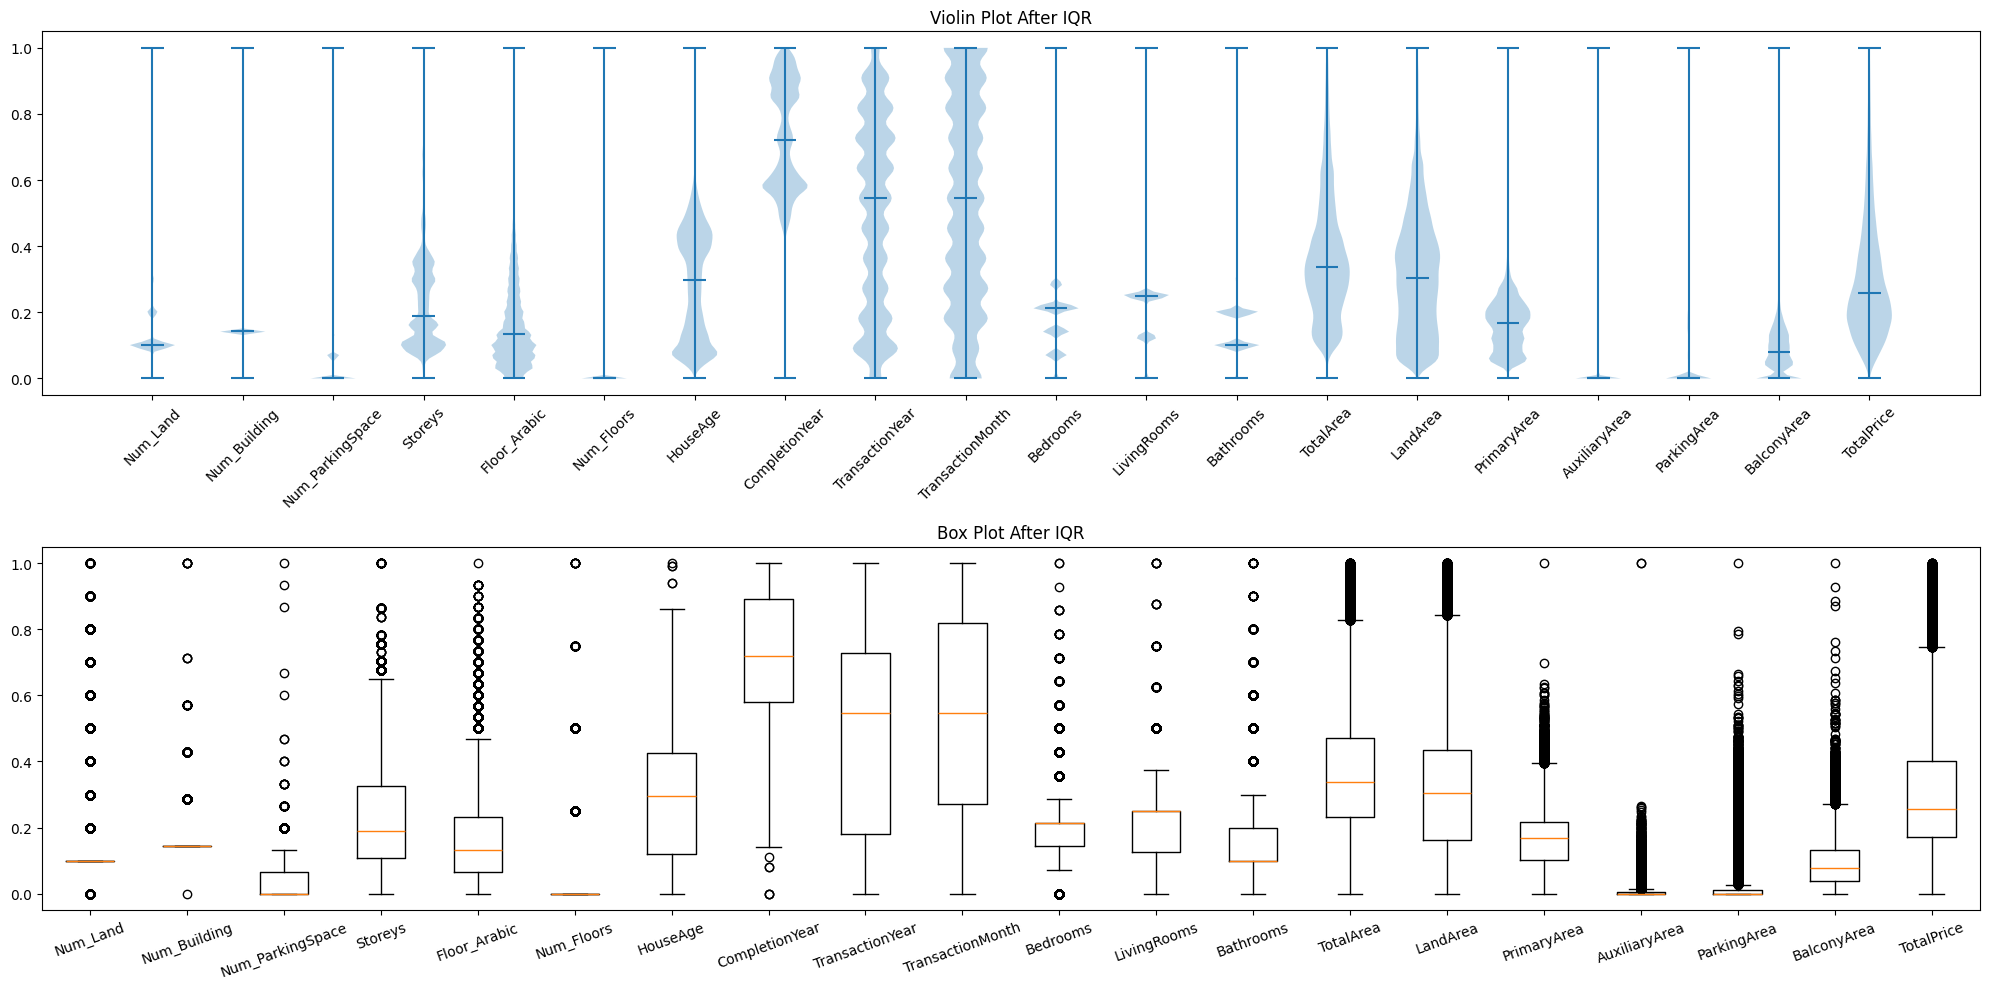

In [31]:
# 將數值欄位 Normalized，畫出 Violin/box plot
data_labels = ['Num_Land', 'Num_Building', 'Num_ParkingSpace',
               'Storeys', 'Floor_Arabic', 'Num_Floors',
               'HouseAge', 'CompletionYear', 'TransactionYear', 'TransactionMonth',
               'Bedrooms', 'LivingRooms', 'Bathrooms',
               'TotalArea', 'LandArea', 'PrimaryArea', 'AuxiliaryArea', 
               'ParkingArea', 'BalconyArea',
               'TotalPrice']

df_normalized = df_IQR.copy()
for name in data_labels:
    df_normalized = pa.normalization(df_normalized, name)
    
pa.violin_box_all(df_normalized, data_labels)

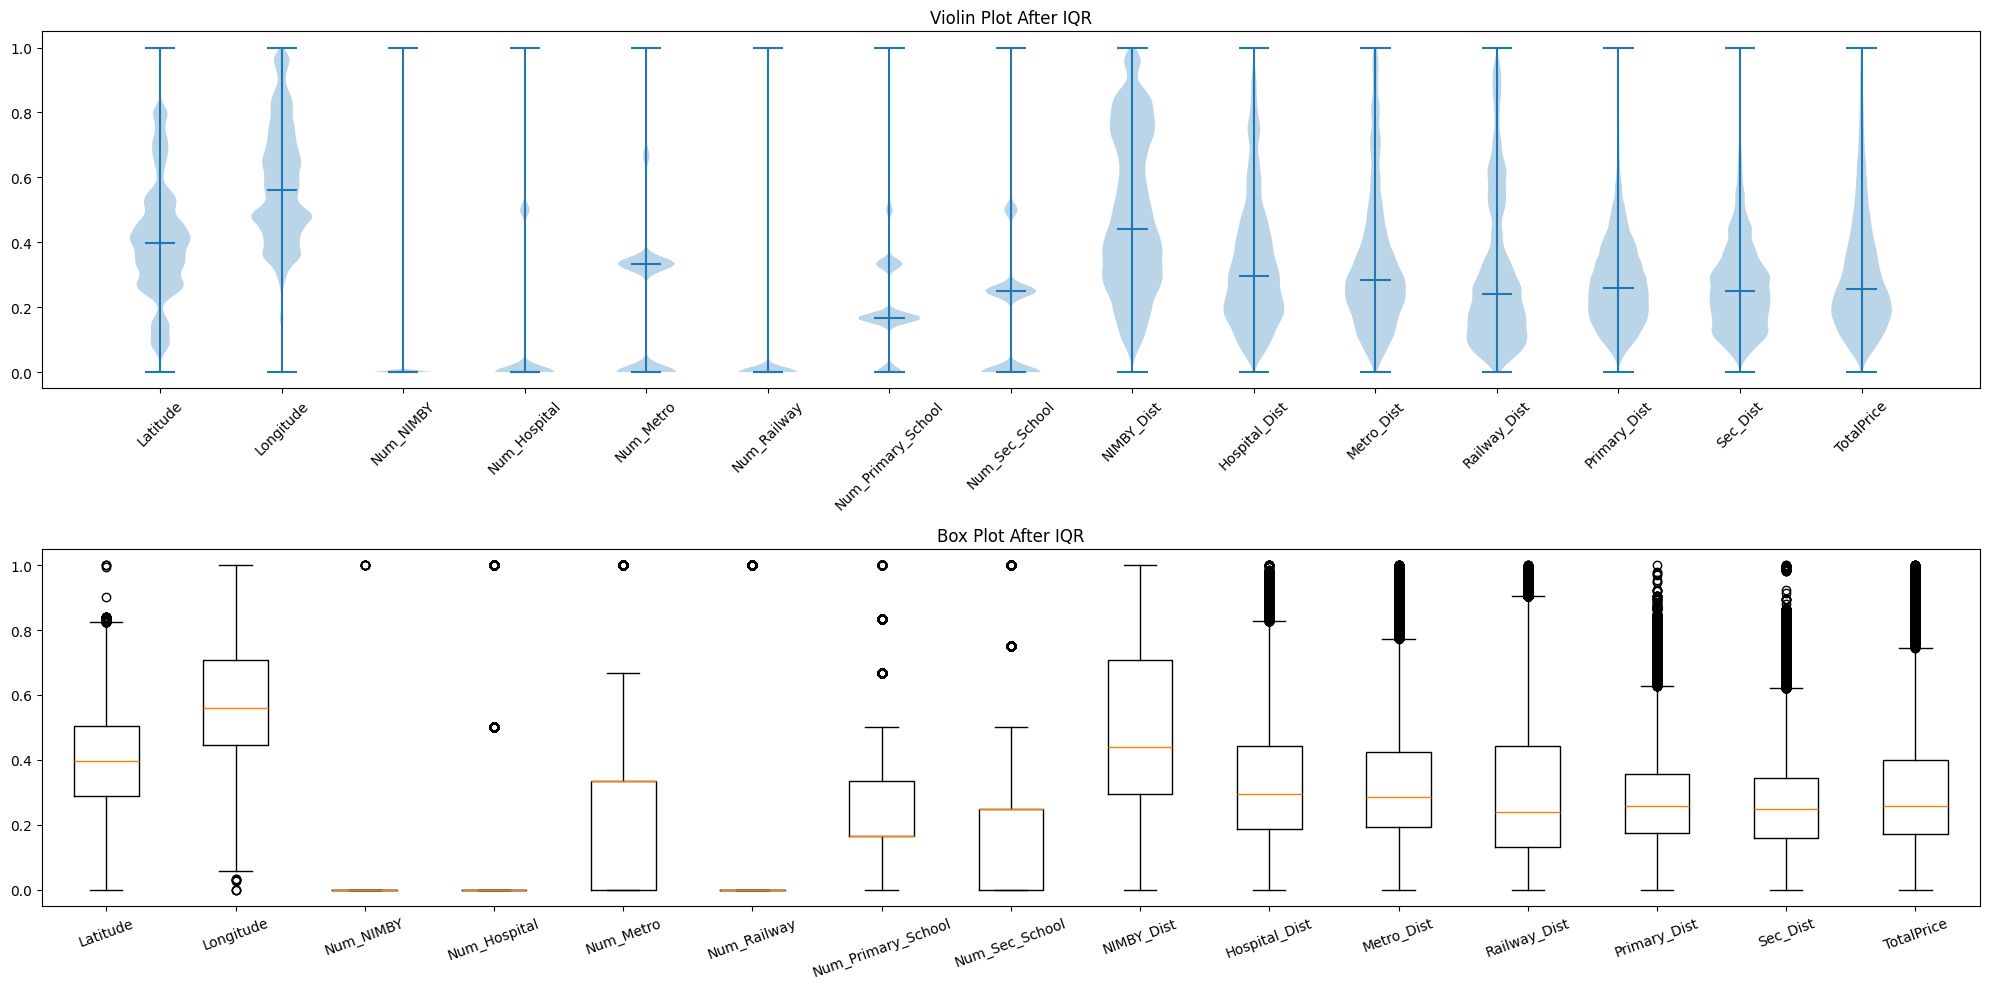

In [32]:
# 將數值欄位 Normalized，畫出 Violin/box plot
data_labels = ['Latitude', 'Longitude',
                'Num_NIMBY', 'Num_Hospital', 'Num_Metro',
                'Num_Railway', 'Num_Primary_School', 'Num_Sec_School',
                'NIMBY_Dist', 'Hospital_Dist', 'Metro_Dist',
                'Railway_Dist', 'Primary_Dist',  'Sec_Dist',
                'TotalPrice']

df_normalized = df_IQR.copy()
for name in data_labels:
    df_normalized = pa.normalization(df_normalized, name)
    
pa.violin_box_all(df_normalized, data_labels)

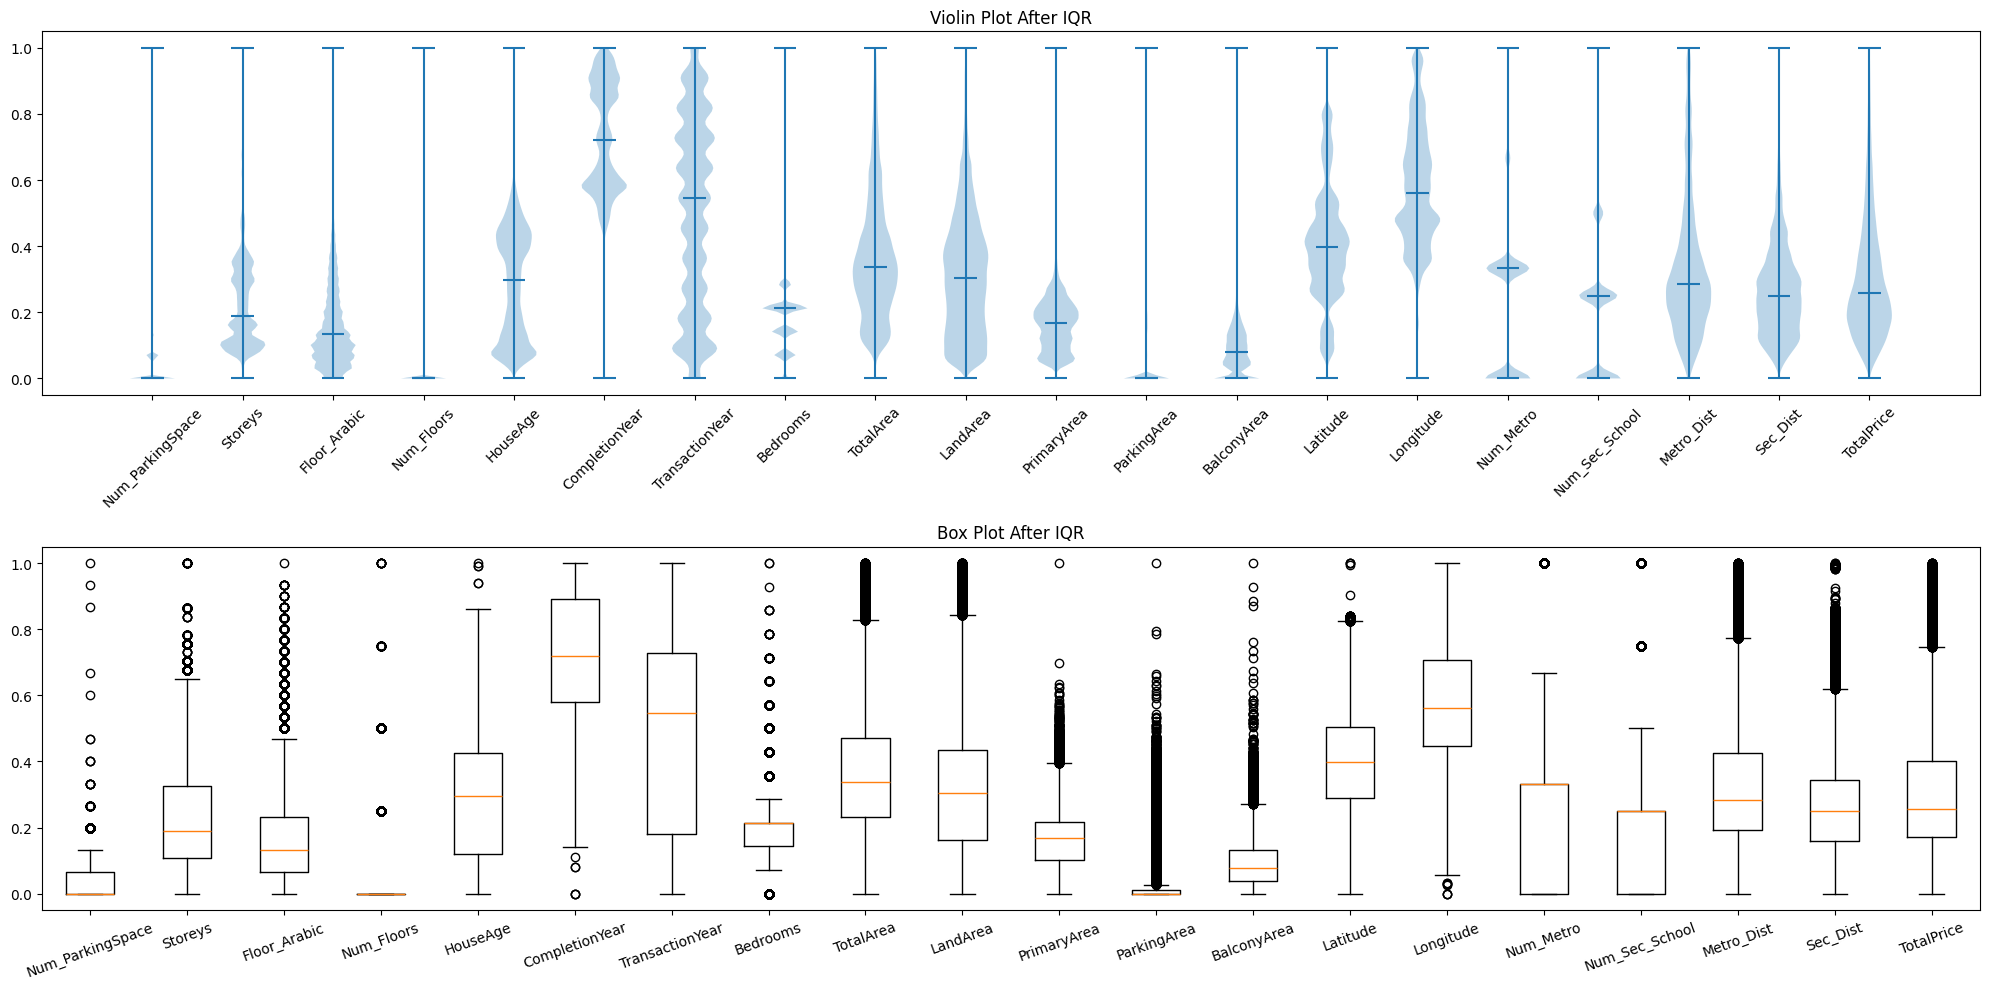

In [42]:
# Creat a simple plot for powerpoint after IQR
#data_labels = ['Num_ParkingSpace', 'Storeys', 'Floor_Arabic', 'Num_Floors',
#               'HouseAge', 'CompletionYear', 'TransactionYear',
#               'Bedrooms', 'TotalArea', 'LandArea', 'PrimaryArea', 'ParkingArea', 'BalconyArea',
#               'Latitude', 'Longitude',
#               'Num_Metro', 'Num_Sec_School', 'Metro_Dist', 'Sec_Dist',
#               'TotalPrice']

#df_normalized = df_IQR.copy()
#for name in data_labels:
#    df_normalized = pa.normalization(df_normalized, name)
    
#pa.violin_box_all(df_normalized, data_labels)

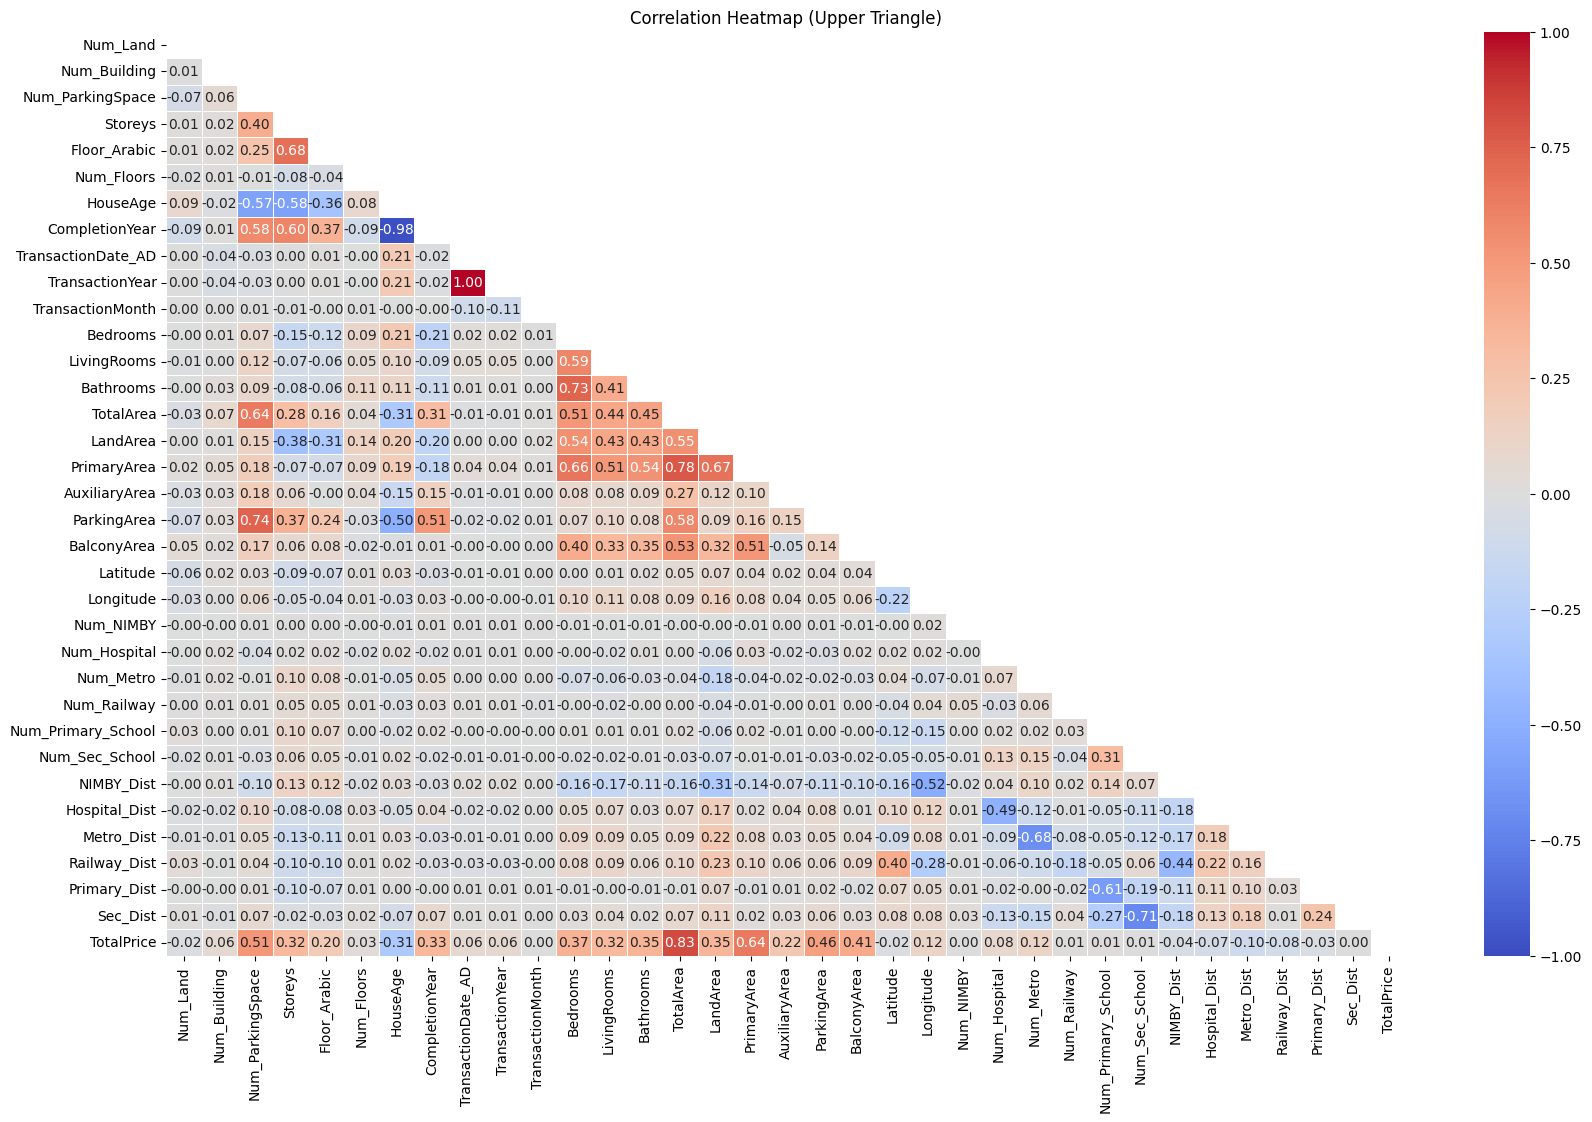

In [34]:
# Calculate the correlation coefficient matrix
pa.all_corr_heatmap(df_IQR)

In [35]:
df_IQR.to_csv('7_noisy_data.csv', encoding='utf-8-sig', index=False)